In [1]:
#Libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_predict



In [2]:
#Loading Data
googleTrend = pd.read_csv("multiTimeline.csv", sep=',', skiprows=[0])
df = pd.read_csv('data_wordle.csv', usecols=['Week', 'Number of  reported results'], sep=',')
googleTrend

,Week,wordle: (United States)
0,2022-01-09,14
1,2022-01-16,31
2,2022-01-23,50
3,2022-01-30,74
4,2022-02-06,87
5,2022-02-13,100
6,2022-02-20,97
7,2022-02-27,92
8,2022-03-06,86
9,2022-03-13,83


In [3]:
# Convert date column to datetime format
googleTrend['Week'] = pd.to_datetime(googleTrend['Week'])

# Extract month from date column
googleTrend['month_column'] = googleTrend['Week'].apply(lambda x: x.strftime('%m'))

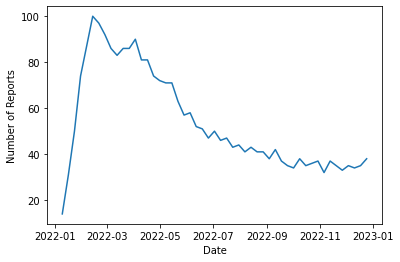

In [4]:
plt.plot(googleTrend['Week'], googleTrend['wordle: (United States)'])
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()

In [5]:
# Convert the 'Week' column to a string
googleTrend['Week'] = pd.to_datetime(googleTrend['Week']).dt.date.astype(str)

# Set the 'Week' column as the index and convert to a dictionary
dict_list = googleTrend.set_index('Week')['wordle: (United States)'].to_dict()

# Print the dictionary
print(dict_list)

{'2022-01-09': 14, '2022-01-16': 31, '2022-01-23': 50, '2022-01-30': 74, '2022-02-06': 87, '2022-02-13': 100, '2022-02-20': 97, '2022-02-27': 92, '2022-03-06': 86, '2022-03-13': 83, '2022-03-20': 86, '2022-03-27': 86, '2022-04-03': 90, '2022-04-10': 81, '2022-04-17': 81, '2022-04-24': 74, '2022-05-01': 72, '2022-05-08': 71, '2022-05-15': 71, '2022-05-22': 63, '2022-05-29': 57, '2022-06-05': 58, '2022-06-12': 52, '2022-06-19': 51, '2022-06-26': 47, '2022-07-03': 50, '2022-07-10': 46, '2022-07-17': 47, '2022-07-24': 43, '2022-07-31': 44, '2022-08-07': 41, '2022-08-14': 43, '2022-08-21': 41, '2022-08-28': 41, '2022-09-04': 38, '2022-09-11': 42, '2022-09-18': 37, '2022-09-25': 35, '2022-10-02': 34, '2022-10-09': 38, '2022-10-16': 35, '2022-10-23': 36, '2022-10-30': 37, '2022-11-06': 32, '2022-11-13': 37, '2022-11-20': 35, '2022-11-27': 33, '2022-12-04': 35, '2022-12-11': 34, '2022-12-18': 35, '2022-12-25': 38}


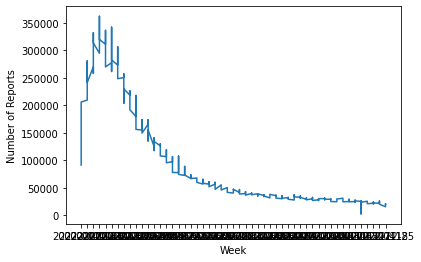

In [6]:
plt.plot(df['Week'], df['Number of  reported results'])
plt.xlabel('Week')
plt.ylabel('Number of Reports')
plt.show()

In [7]:
arr = []
for index, row in df.iterrows():
    if row['Week'] in dict_list:
        arr.append(dict_list[row['Week']])
df['Popularity'] = arr
df

,Week,Number of reported results,Popularity
0,2022-01-09,91477,14
1,2022-01-09,107134,14
2,2022-01-09,153880,14
3,2022-01-09,137586,14
4,2022-01-09,132726,14
...,...,...,...
352,2022-12-25,20879,38
353,2022-12-25,20160,38
354,2022-12-25,20001,38
355,2022-12-25,21204,38


### __DATA EXPLORATION__

The initial step in the analysis was to verify the presence of missing or null values within the dataset. These missing values, if not addressed adequately, can have a negative impact on the performance or result in a biased model. After examination, it was determined that there were no missing values in the dataset.

In [8]:
#missing data

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Week                         357 non-null    object
 1   Number of  reported results  357 non-null    int64 
 2   Popularity                   357 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.5+ KB


,Week,Number of reported results,Popularity
0,2022-01-09,91477,14
1,2022-01-09,107134,14
2,2022-01-09,153880,14
3,2022-01-09,137586,14
4,2022-01-09,132726,14
...,...,...,...
352,2022-12-25,20879,38
353,2022-12-25,20160,38
354,2022-12-25,20001,38
355,2022-12-25,21204,38


Our table of statistics showed that the variables are spread widely. In machine learning, it is common for variables to have a wide range of values, as shown by the table of statistics. This wide spread can lead to inconsistencies and affect the predictions made by the model. To address this issue, various preprocessing techniques can be applied to transform the variables, such as normalization, scaling, or standardization, to ensure that all the variables are on the same scale and to prevent any one variable from having a disproportionate influence on the model. By transforming the variables, the performance and accuracy of the machine learning models can be improved. We will discuss our apporach in the latter sections.

In [9]:
#overall statistics

df.describe()


,Number of reported results,Popularity
count,357.000000,357.000000
mean,90918.050420,54.137255
std,89521.375911,21.628261
min,2569.000000,14.000000
25%,30214.000000,37.000000
50%,44212.000000,46.000000
75%,121356.000000,74.000000
max,361908.000000,100.000000


Many statistical techniques, such as linear regressions and t-tests, assume normality in their underlying data distribution. To assess this assumption, histograms were utilized to visualize the distribution of the variables. The results showed that some variables had a skewed distribution.

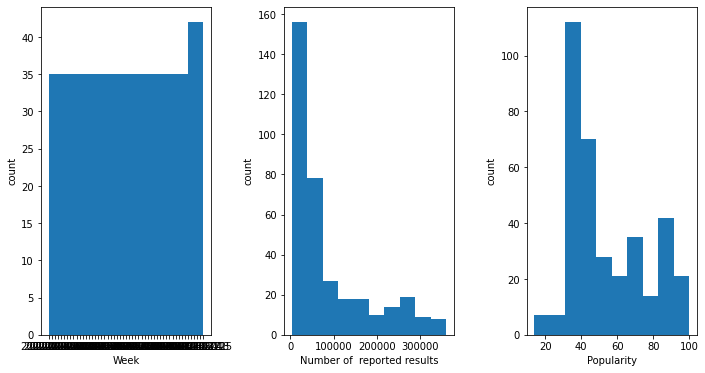

In [10]:
#Red Wine Normality Distribution
fig = plt.figure(figsize = [20,10])
cols = df.columns
count = 1
for col in cols:
    ax = plt.subplot(2,6,count)
    count+=1
    plt.hist(df[col])
    ax.set_xlabel(xlabel=col)
    ax.set_ylabel(ylabel="count")
plt.tight_layout()
plt.savefig('histogram_red.jpeg')

#do different scaling for each, if it's too skwed we can do log scaling


We then employed the use of boxplots to detect outliers. Outliers are defined as data points that deviate significantly from the main distribution of the data (Point 1). These deviations can either be a result of measurement errors or can reflect the true variation of the data. Outliers can significantly impact the summary statistics and make them unrepresentative of the main distribution of the data. Our analysis of the boxplots revealed the presence of outliers or skewness in all variables except alcohol.

In the process of data exploration (Point 5), it is important to assess the presence of high feature correlation within the data (Zuur, 2010). This is because, although high correlation may not necessarily degrade the prediction performance of the model, it can introduce collinearity and affect the estimated coefficients. This can lead to an unreliable interpretation of feature significance, as the coefficients may fluctuate significantly based on other correlated features. Our analysis through a heatmap revealed strong correlations among density, citric acid, and fixed acidity, as well as between free sulfur dioxide and total sulfur dioxide.

#Pretend you are writing a machine learning professional but don't know what to do 

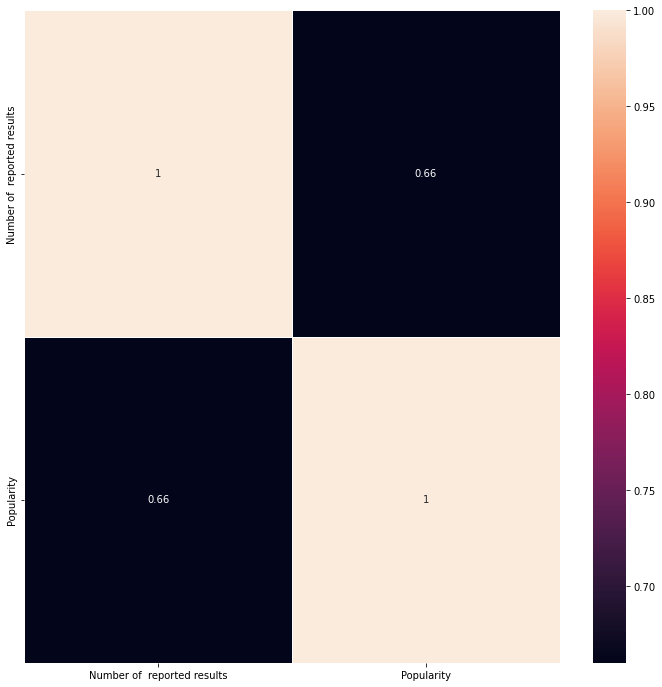

In [12]:
# Heatmap and Correlation 
#glue = sns.load_dataset(df).pivot("Model", "Task", "Score")
fig, ax = plt.subplots(figsize = (12,12))
df1 = pd.DataFrame(df, columns=cols)
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.savefig('heatmap_red.jpeg')


In [21]:
#getting inputs and target
X = df.values[:, 2].reshape(-1,1)
Y = df.values[:, 1]
X

Coefficients: [ 0.00000000e+00 -1.12192341e+04  1.78930092e+02 -6.54969559e-01]


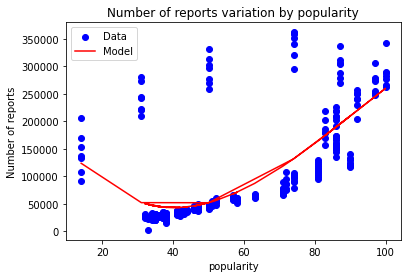

AttributeError: 'Series' object has no attribute 'reshape'

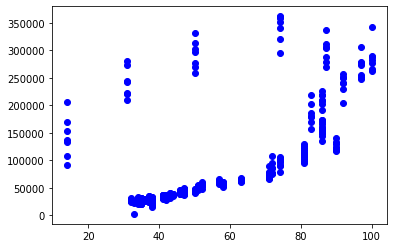

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Popularity'], df['Number of  reported results'], test_size= 0.2)

# Create a polynomial feature transformer
poly_transformer = PolynomialFeatures(degree=3)

# Transform the input features to include polynomial features
X_train_poly = poly_transformer.fit_transform(X_train.values.reshape(-1, 1))

# Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Fit the model to the training data
model.fit(X_train_poly, y_train)

y_predicted = model.predict(X_train_poly)

# Get the coefficients
coefficients = model.coef_

print('Coefficients:', coefficients)

x = df['Popularity']
y = df['Number of  reported results']
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(poly_transformer.transform(x.values.reshape(-1, 1))), color='red', label='Model')
plt.xlabel('popularity')
plt.ylabel('Number of reports')
plt.title('Number of reports variation by popularity')
plt.legend()
plt.show()

# Plot the data and the model
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(poly_transformer.fit_transform(x.reshape(-1,1))), color='red', label='Model')

plt.legend()
print(model.intercept_ + coeff[0]*15 + coeff[1]*(30**2))

### Data Pre-processing

In [189]:
#Train-Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
 

#Z scaling
std_scaler = StandardScaler()
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train))
X_test = pd.DataFrame(std_scaler.fit_transform(X_test))

### Baseline Model

In [190]:
#Baseline Model
m = len(Y_test)
Y_pred =[]
for i in range(m):
    Y_pred.append(np.mean(Y))

print("baseline mse: ", mean_squared_error(Y_test,Y_pred))
print("baseline mape: ", mean_absolute_percentage_error(Y_test,Y_pred))

baseline mse:  9280239918.589727
baseline mape:  1.2733004306330753


### Ridge Regressor Model

In [191]:
#sklearn Ridge with builtin cross-validation
r_alphas = np.logspace(-5, 2, 100) #grid search
rmodel = RidgeCV(r_alphas).fit(X_train, Y_train)

print("Training data")
Y_pred = rmodel.predict(X_train)
print("r: ", rmodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = rmodel.predict(X_test)
print("r: ", rmodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal Alpha: ", rmodel.alpha_)

Training data
r:  0.41620681188738895
mse:  4470331590.286425
mape:  0.5950213841649078

Testing data
r:  0.4572220143682467
mse:  4963161196.564915
mape:  0.4405407184015721
Optimal Alpha:  1.4508287784959402


### LASSO Model

In [167]:
# sklearn LASSO WITH CROSS VALIDATION
lmodel = LassoCV(cv=10, random_state=0).fit(X_train, Y_train)

print("Training data")
Y_pred = lmodel.predict(X_train)
print("r: ", lmodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = lmodel.predict(X_test)
print("r: ", lmodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal Alpha: ", lmodel.coef_)


Training data
r:  0.416217072749532
mse:  4470253018.872582
mape:  0.5922206396739731

Testing data
r:  0.45777014198969224
mse:  4958149118.3054085
mape:  0.4376308399457405
Optimal Alpha:  [56398.29933859]


### Elastic - Net Model

In [168]:
# sklearn Elastic Net with built in CV
l1_ratios = np.linspace(0.001, 1, 100)
emodel = ElasticNetCV(l1_ratio=l1_ratios,cv=10, random_state=0)
emodel.fit(X_train, Y_train)

print("Training data")
Y_pred = emodel.predict(X_train)
print("r: ", emodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = emodel.predict(X_test)
print("r: ", emodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal l1_ratio: ", emodel.l1_ratio_)



Training data
r:  0.416217072749532
mse:  4470253018.872582
mape:  0.5922206396739731

Testing data
r:  0.45777014198969224
mse:  4958149118.3054085
mape:  0.4376308399457405
Optimal l1_ratio:  1.0


### Support Vector Regression Model

In [14]:
#sklearn SVR
#model after grid search hyperparameter tuning
smodel = SVR(kernel="rbf", gamma=0.14)
smodel.fit(X_train, Y_train)

print("Training data")
Y_pred = smodel.predict(X_train)
print("r: ", smodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = smodel.predict(X_test)
print("r: ", smodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))



Training data
r:  0.5825191837997474
mse:  0.2716099170605077
mape:  0.06504102896076158

Testing data
r:  0.4720747531991819
mse:  0.34500224209632757
mape:  0.08008931016348508
